<a href="https://colab.research.google.com/github/RayKwon2040/E-Commerce-CLV-Prediction/blob/main/E_Commerce_CLV(Customer_Life_Value)_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Customer Life Value Prediction**

## **Introduction**



The e-commerce customer dataset includes 13 variables, such as purchase date, purchase amount, product category, quantity, returns, churn status, and others.

Customer lifetime value (CLV) is a critical metric because it enables businesses to make smarter, data-driven decisions that foster customer loyalty, reduce acquisition costs, and ensure sustainable profitability. As a result, CLV is a cornerstone metric for long-term business success.

The objective of this project is to develop a CLV prediction model. By leveraging this model, the e-commerce company can make strategic decisions based on predicted CLV. For example, discounts can be offered to customers with low predicted CLV to boost engagement, while loyalty programs can be targeted toward high-CLV customers.

## **Table of Contents**



1.   Introduction
2.   Exploratory Data Analysis (EDA)
3.   Feature Engineering
4.   Model Development
5.   Feture Importance
6.   Conclusion



In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("shriyashjagtap/e-commerce-customer-for-behavior-analysis")

print("Path to dataset files:", path)
path=os.path.join(path,os.listdir(path)[0])
print(path)

Using Colab cache for faster access to the 'e-commerce-customer-for-behavior-analysis' dataset.
Path to dataset files: /kaggle/input/e-commerce-customer-for-behavior-analysis
/kaggle/input/e-commerce-customer-for-behavior-analysis/ecommerce_customer_data_large.csv


In [ ]:
import pandas as pd
df=pd.read_csv(path)
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


## **Exploratory Data Analysis (EDA)**

In [ ]:
#description

df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [ ]:
#check null values

df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


In [ ]:
df['Returns'].sum()

np.float64(101476.0)

In [ ]:
#fill NAN with 0.5 in Return columns


df['Returns'].fillna(0.5,inplace=True)

/tmp/ipython-input-2488377302.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Returns'].fillna(0.5,inplace=True)


In [ ]:
#Check duplication

df.duplicated().sum()

np.int64(0)

In [ ]:
#Remove rebundant column

df = df.drop(['Customer Name', 'Age'], axis=1)

In [ ]:
df.dtypes

,0
Customer ID,int64
Purchase Date,object
Product Category,object
Product Price,int64
Quantity,int64
Total Purchase Amount,int64
Payment Method,object
Customer Age,int64
Returns,float64
Gender,object


In [ ]:
#transform data column to pd.date

df['Purchase Date']=pd.to_datetime(df['Purchase Date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
str(df[df.columns[1]].dtype) == 'int64'

False

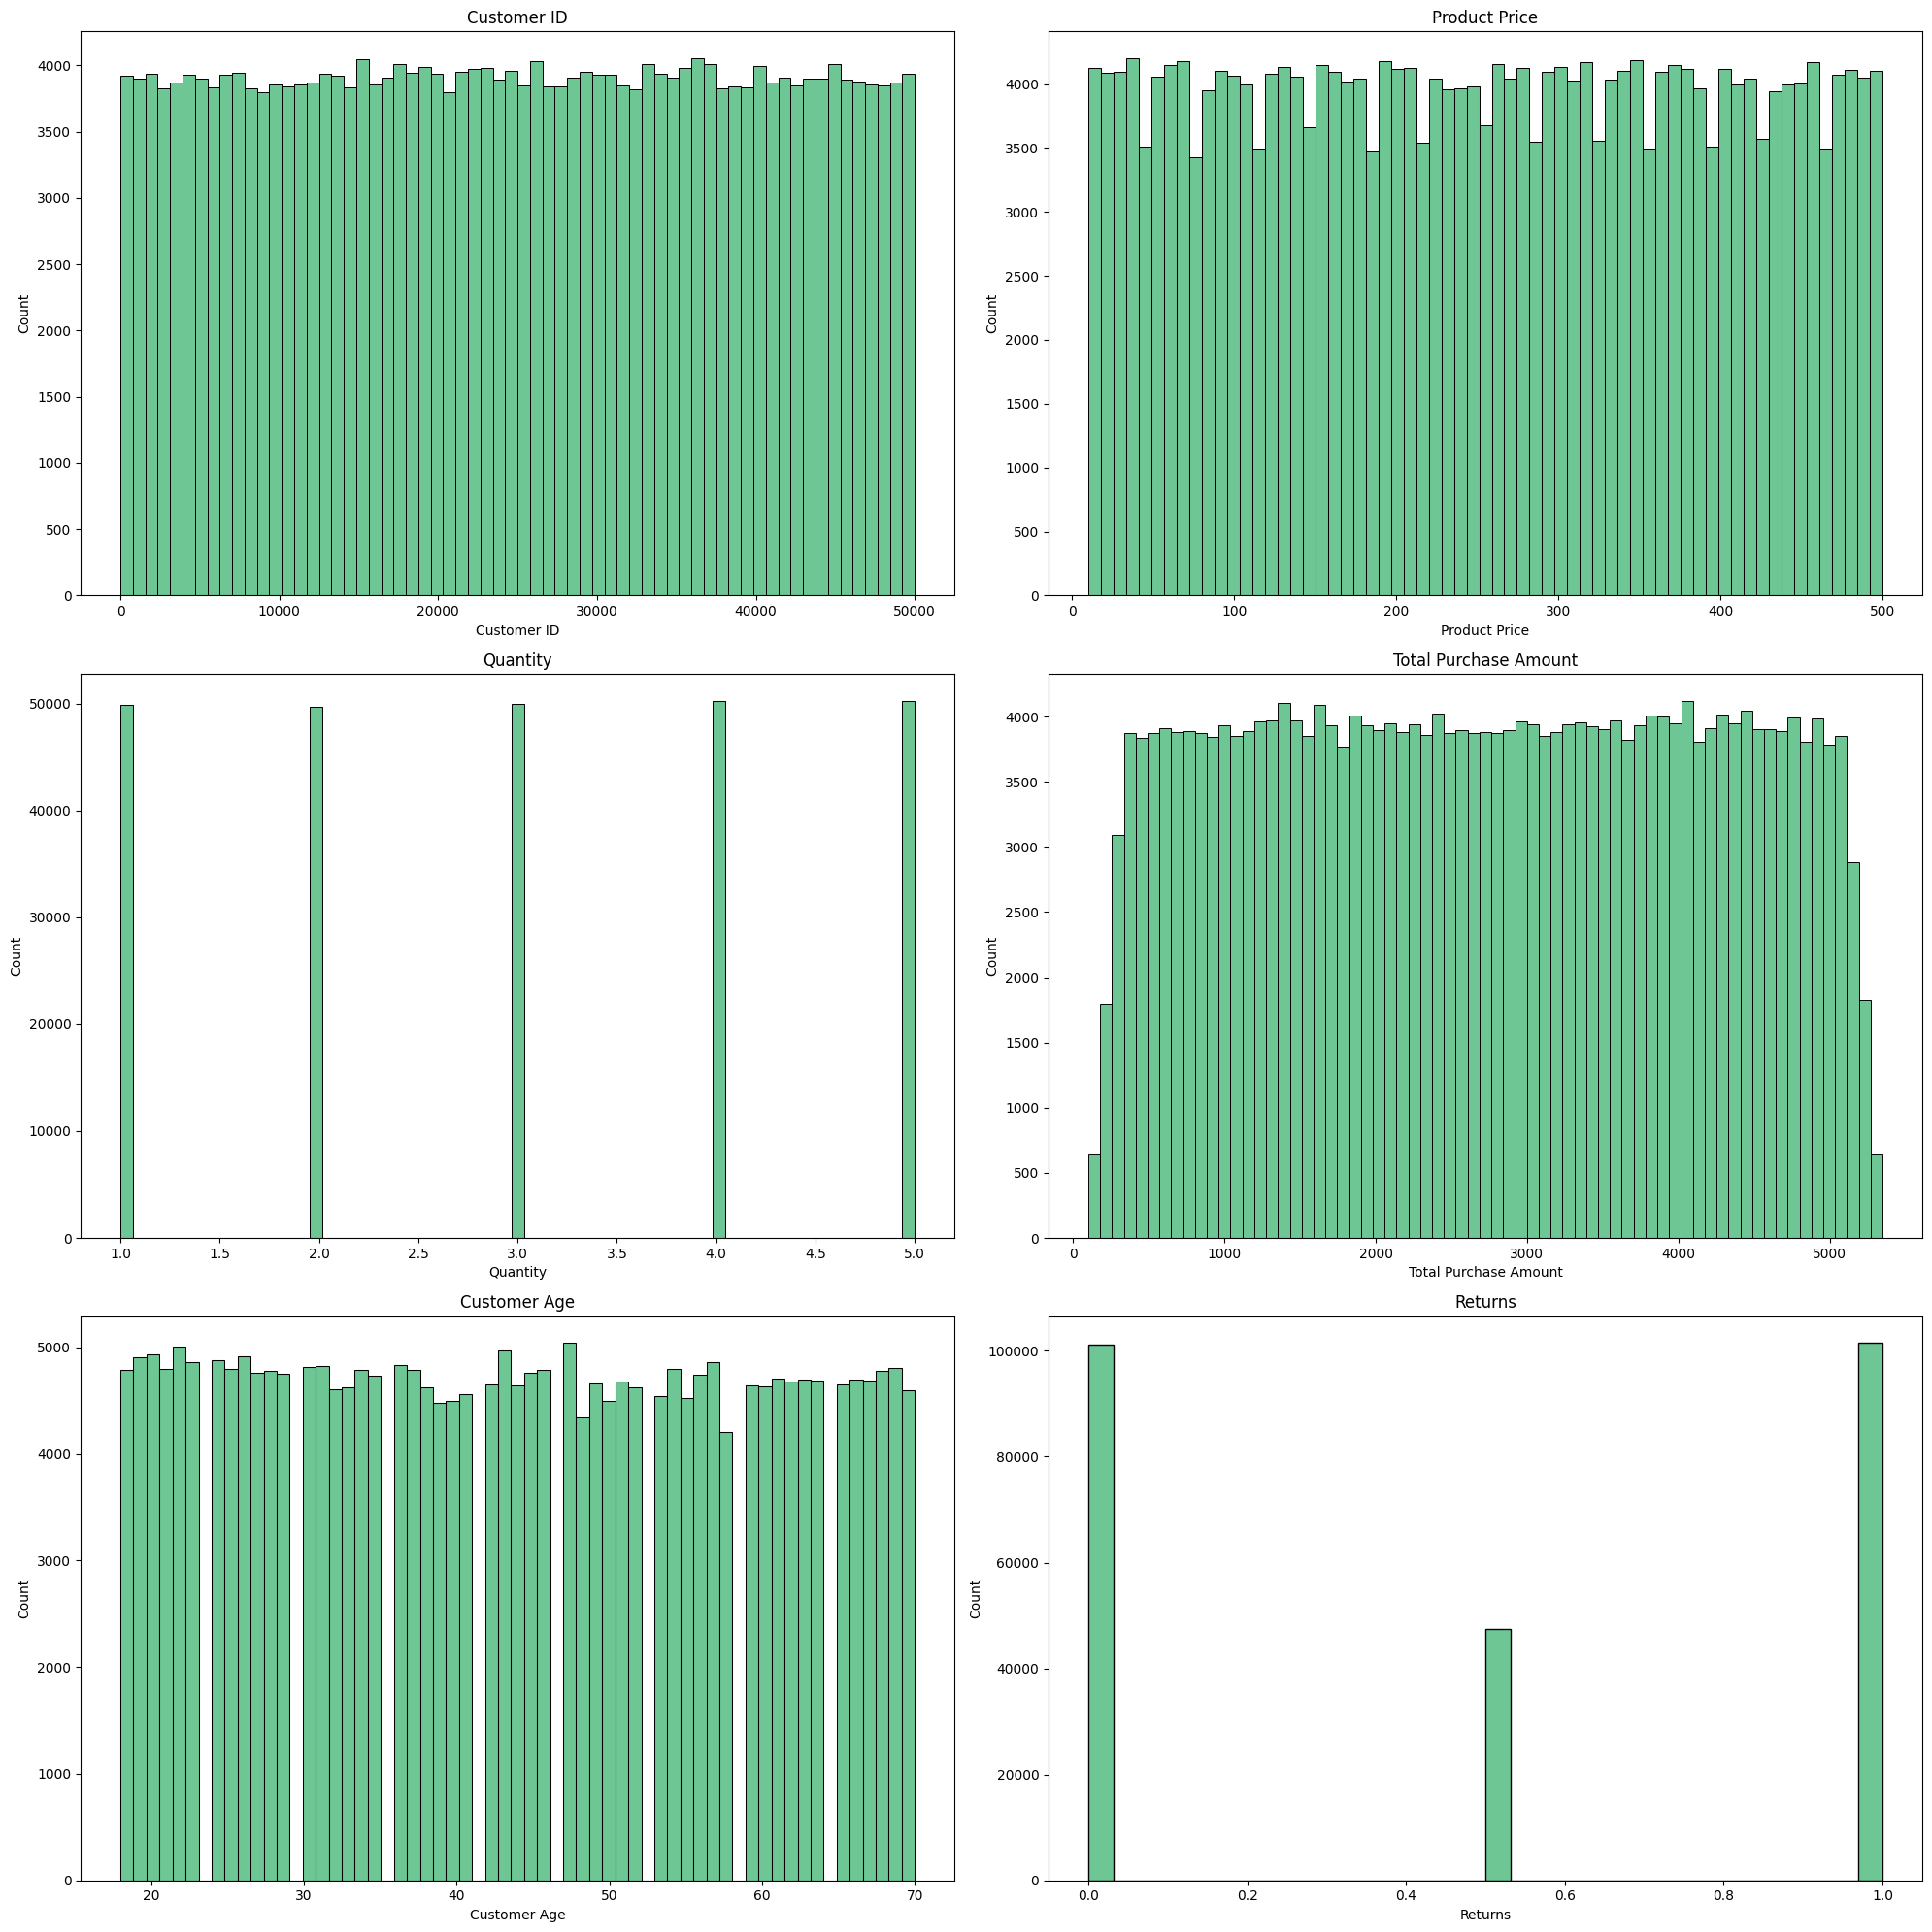

In [ ]:
#Visualize continuous variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(20,20), ncols=2, nrows=3)
axes = axes.flatten() # Flatten the 3x3 array of axes into a 1D array for easier indexing

plot_idx = 0 # Initialize a counter for the subplots
for i in range(len(df.columns)):
  if str(df[df.columns[i]].dtype) == 'int64' or str(df[df.columns[i]].dtype) == 'float64':
    if plot_idx < len(axes): # Ensure we don't go out of bounds of the axes array
      sns.histplot(df[df.columns[i]], ax=axes[plot_idx], color='mediumseagreen')
      axes[plot_idx].set_title(df.columns[i])
      plot_idx += 1
    else:
      print(f"Warning: Not enough subplots for all numeric columns. Skipping {df.columns[i]}")
      break # Stop plotting if we run out of subplots

# Hide any unused subplots if the number of numeric columns is less than the total subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j]) # This removes the empty subplot

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Key Findings**



*   The churn rate is 20%, and the return rate is 50%. Since customer age is evenly distributed from the 20s to the 60s, churn and return rates do not appear to be heavily concentrated in any specific age group. Although the churn rate is slightly higher among customers in their 20s, overall churn is relatively evenly distributed across age groups. Therefore, product and service improvements should be implemented broadly rather than targeting a specific age segment.










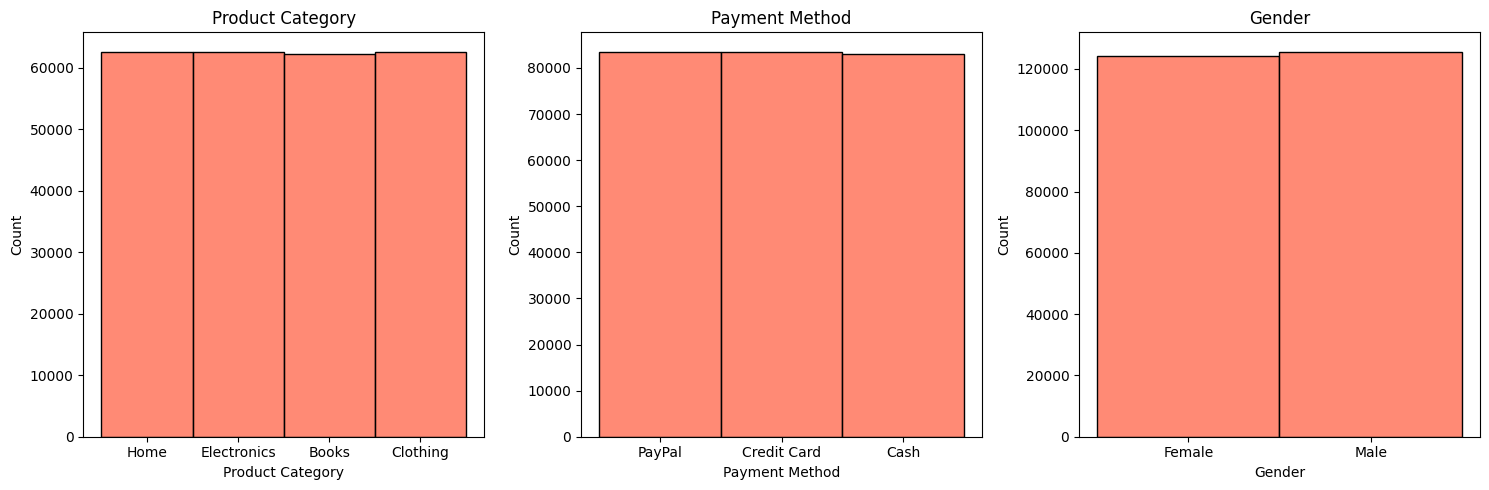

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize object columns

fig, axes = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
axes = axes.flatten() # Flatten the 3x3 array of axes into a 1D array for easier indexing

object_col = ['Product Category', 'Payment Method', 'Gender']

plot_idx = 0 # Initialize a counter for the subplots
for i in (object_col):
  if plot_idx < len(axes): # Ensure we don't go out of bounds of the axes array
    sns.histplot(df[i], ax=axes[plot_idx], color='tomato')
    axes[plot_idx].set_title(i)
    plot_idx += 1
  else:
    print(f"Warning: Not enough subplots for all numeric columns. Skipping {i}")
    break # Stop plotting if we run out of subplots

# Hide any unused subplots if the number of numeric columns is less than the total subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j]) # This removes the empty subplot

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

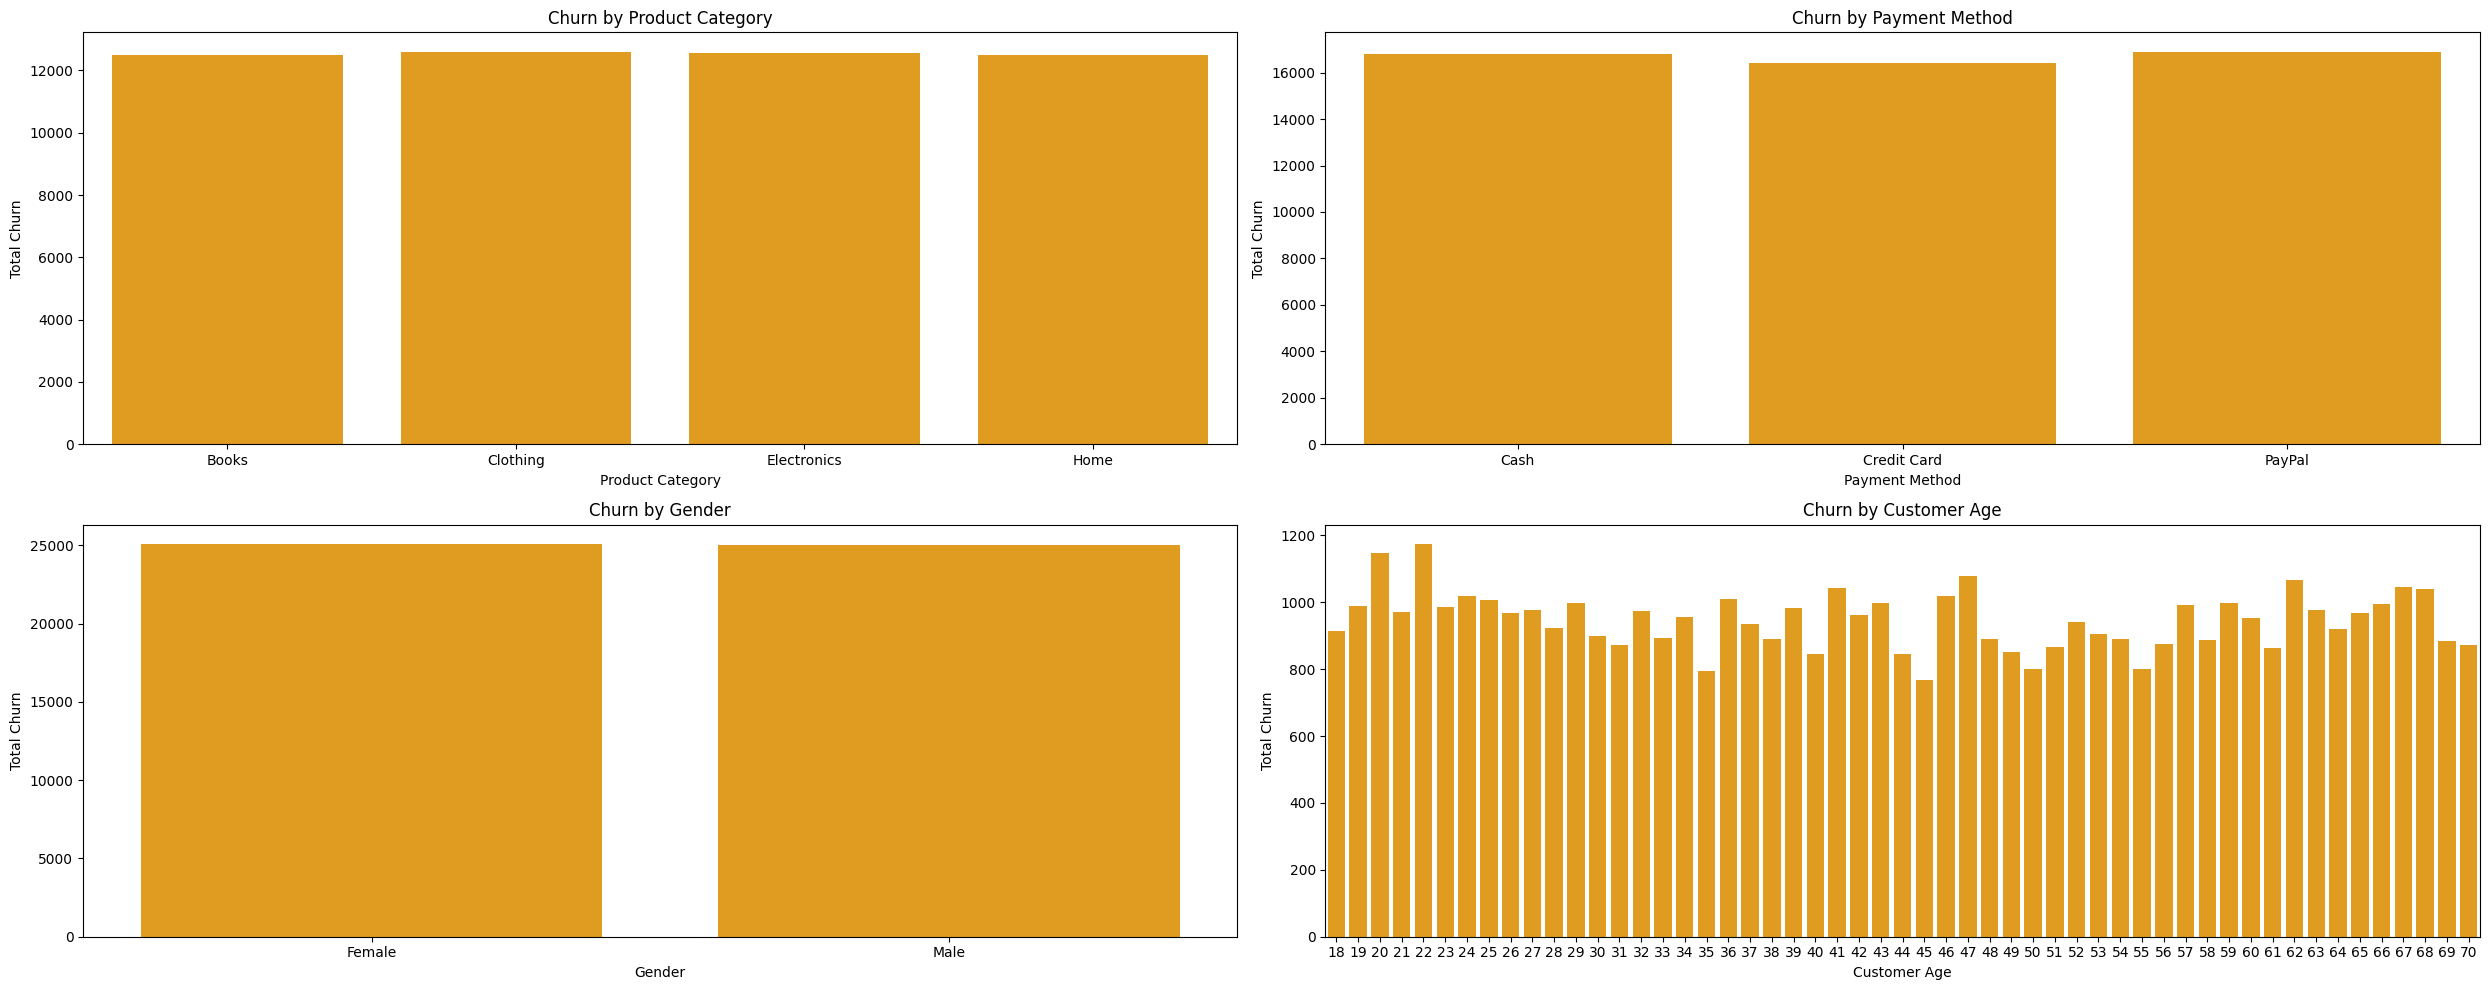

In [ ]:

object_col = ['Product Category', 'Payment Method', 'Gender', 'Customer Age']

fig, axes = plt.subplots(figsize=(25, 10), ncols=2, nrows=2)
axes = axes.flatten() # Flatten the array of axes for easy indexing

for idx, col in enumerate(object_col):
    grpby = df.groupby(col)['Churn'].sum()
    sns.barplot(x=grpby.index, y=grpby.values, ax=axes[idx], color='Orange')
    axes[idx].set_title(f'Churn by {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Total Churn')

plt.tight_layout()
plt.show()

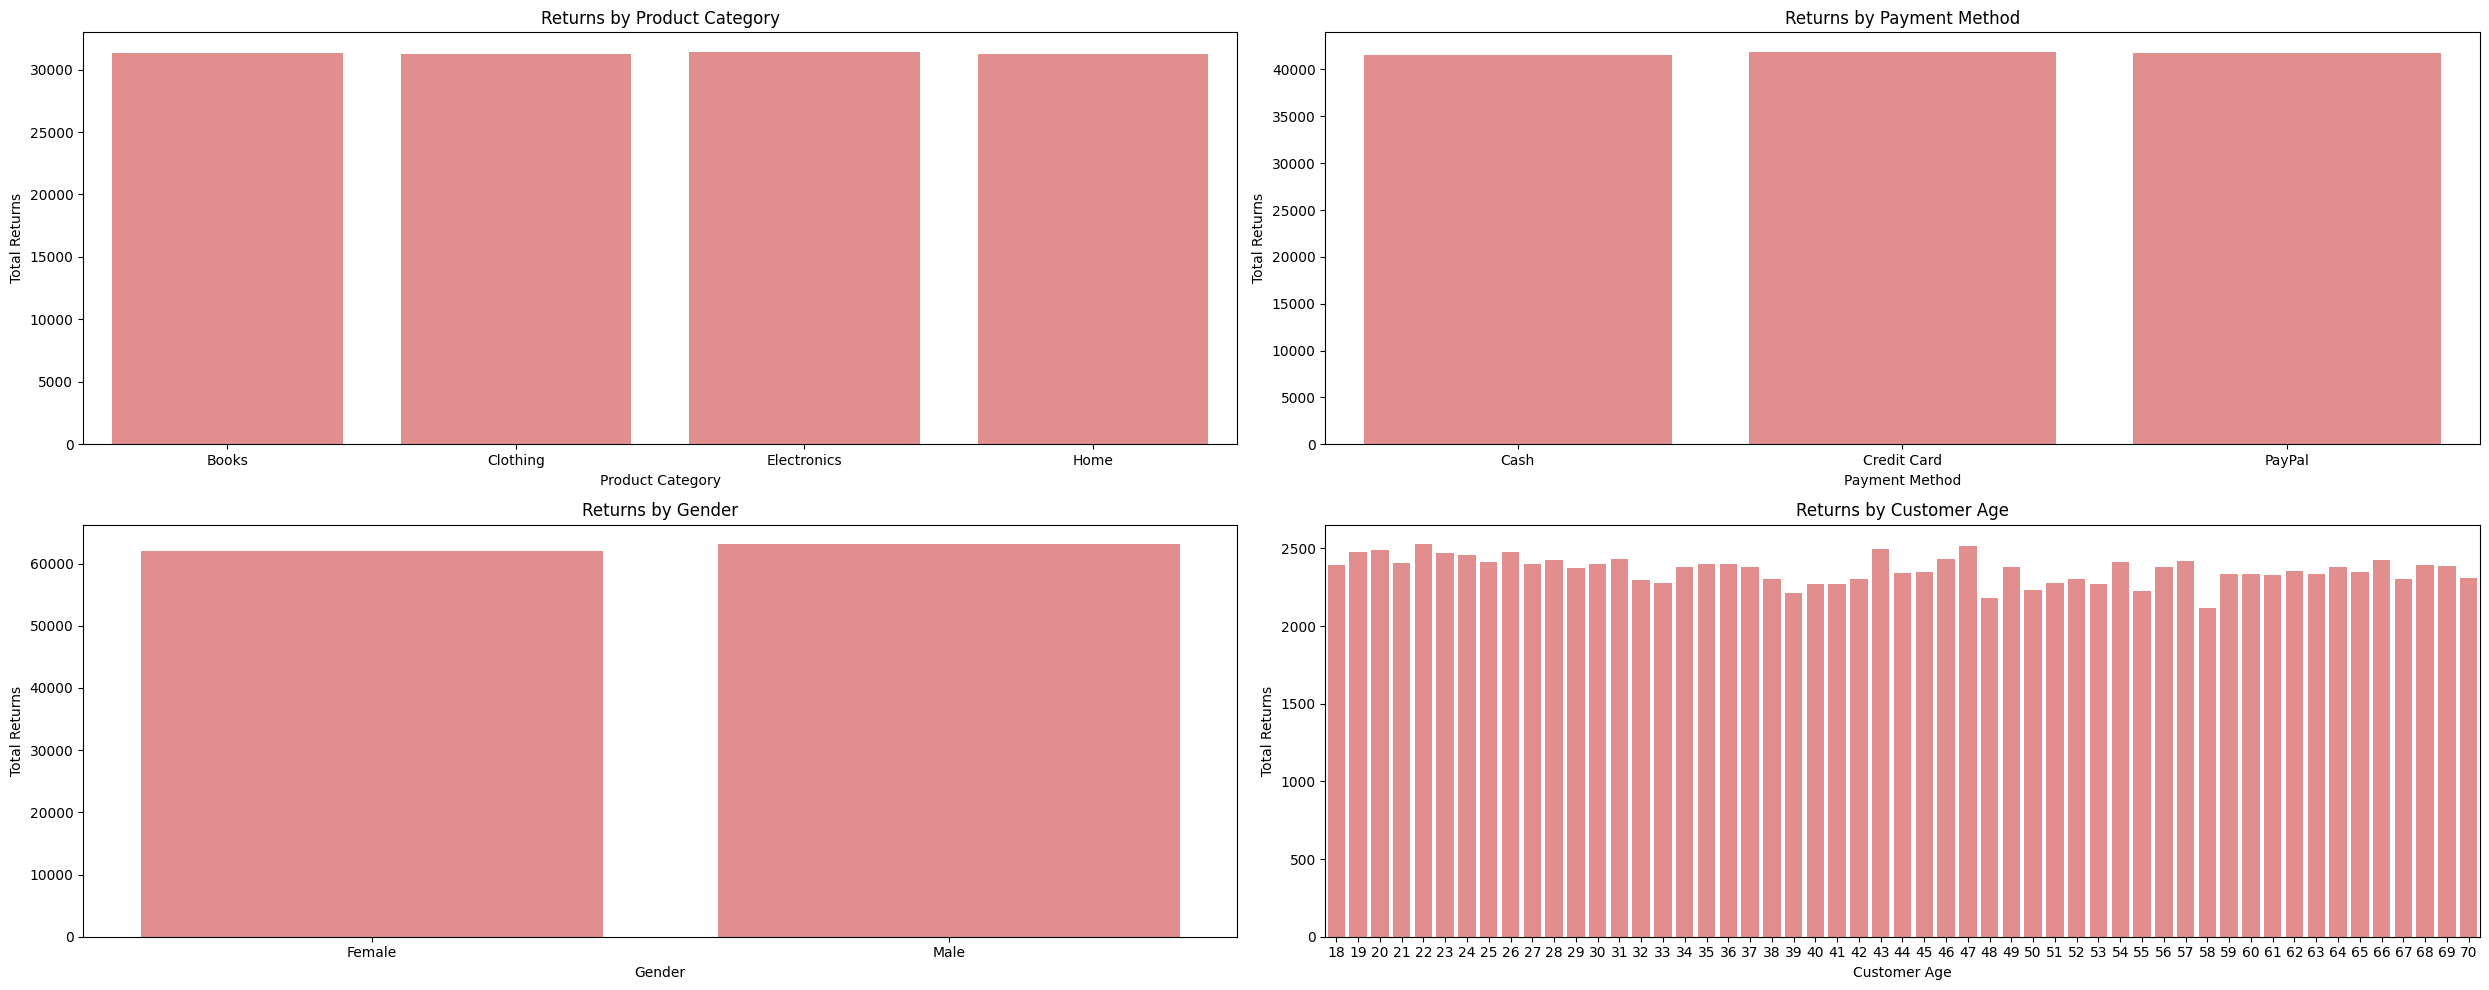

In [ ]:
object_col = ['Product Category', 'Payment Method', 'Gender', 'Customer Age']

fig, axes = plt.subplots(figsize=(25, 10), ncols=2, nrows=2)
axes = axes.flatten() # Flatten the array of axes for easy indexing

for idx, col in enumerate(object_col):
    grpby = df.groupby(col)['Returns'].sum()
    sns.barplot(x=grpby.index, y=grpby.values, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Returns by {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Total Returns')

plt.tight_layout()
plt.show()

Key Findings

The churn rate is 20%, and the return rate is 50%. These rates are evenly distributed across the following factors:

*   Product Category
*   Payment Method
*   Gender
*   Customer Age

Churn and return rates do not appear to be heavily concentrated in any specific feature. Although the churn rate is slightly higher among customers in their 20s and lower among those in their 40s, returns are relatively evenly distributed across age groups.

Therefore, product and service improvements should be implemented broadly rather than targeting specific customer segments or products.

## **Feature Engineering**

In [ ]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,Female,0
...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,0.5,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Male,0


In [ ]:
df= pd.get_dummies(df, columns=['Gender','Product Category','Payment Method'], dtype=int)
df

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn,Gender_Female,Gender_Male,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal
0,44605,2023-05-03 21:30:02,177,1,2427,31,1.0,0,1,0,0,0,0,1,0,0,1
1,44605,2021-05-16 13:57:44,174,3,2448,31,1.0,0,1,0,0,0,1,0,0,0,1
2,44605,2020-07-13 06:16:57,413,1,2345,31,1.0,0,1,0,1,0,0,0,0,1,0
3,44605,2023-01-17 13:14:36,396,3,937,31,0.0,0,1,0,0,0,1,0,1,0,0
4,44605,2021-05-01 11:29:27,259,4,2598,31,1.0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,436,1,3664,63,0.0,0,0,1,0,0,0,1,1,0,0
249996,20455,2021-06-04 05:45:25,233,1,4374,66,1.0,0,1,0,0,0,1,0,0,1,0
249997,28055,2022-11-10 17:11:57,441,5,5296,63,0.5,0,1,0,0,0,1,0,1,0,0
249998,15023,2021-06-27 14:42:12,44,2,2517,64,1.0,0,0,1,0,0,1,0,1,0,0


In [ ]:
df_1 = df.groupby("Customer ID").agg(
    min_date=("Purchase Date", "min"),
    max_date=("Purchase Date", "max"),
    Total_returns=("Returns", "sum"),
    Total_spent=("Total Purchase Amount", "sum"),
    Books = ("Product Category_Books", "sum"),
    Clothing = ("Product Category_Clothing", "sum"),
    Electronics = ("Product Category_Electronics", "sum"),
    Furniture = ("Product Category_Home", "sum"),
    Payment_Cash = ("Payment Method_Cash", "sum"),
    Payment_Credit = ("Payment Method_Credit Card", "sum"),
    Payment_Paypal = ("Payment Method_PayPal", "sum"),
    Gender_Male=("Gender_Male", "first"),
    Gender_Female=("Gender_Female", "first"),
    Age=("Customer Age", "first"),
    churn=("Churn", "sum")
).reset_index()


In [ ]:
df_1

,Customer ID,min_date,max_date,Total_returns,Total_spent,Books,Clothing,Electronics,Furniture,Payment_Cash,Payment_Credit,Payment_Paypal,Gender_Male,Gender_Female,Age,churn
0,1,2020-03-04 10:26:02,2022-11-29 06:48:25,1.0,6290,1,1,1,0,1,2,0,0,1,67,0
1,2,2020-07-31 16:27:41,2023-07-03 17:26:19,4.0,16481,1,1,3,1,2,1,3,0,1,42,0
2,3,2020-01-19 00:03:00,2023-02-03 03:58:07,1.5,9423,0,1,2,1,1,2,1,1,0,31,0
3,4,2020-10-12 22:03:10,2022-06-29 03:41:09,3.0,7826,2,1,1,1,2,1,2,1,0,37,0
4,5,2020-04-08 21:57:19,2022-07-16 04:08:09,4.0,9769,2,0,0,3,1,2,2,0,1,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49656,49996,2020-09-05 07:32:48,2022-09-19 00:20:18,2.5,24034,3,0,1,3,5,0,2,0,1,45,0
49657,49997,2021-07-22 19:03:00,2022-08-21 12:46:16,0.0,5714,0,1,1,0,1,0,1,1,0,65,0
49658,49998,2020-05-01 10:59:19,2023-08-31 11:32:30,6.0,20495,6,2,2,0,4,4,2,0,1,31,10
49659,49999,2020-07-23 06:56:05,2022-09-22 15:46:41,3.5,14321,2,1,2,1,3,1,2,0,1,70,0


In [ ]:
df_1["Customer lifespan"]= (df_1["max_date"] - df_1["min_date"]).dt.days / 365.25
df_1["Customer lifespan"] = df_1["Customer lifespan"].clip(lower=1/365.25)

In [ ]:
df_1

,Customer ID,min_date,max_date,Total_returns,Total_spent,Books,Clothing,Electronics,Furniture,Payment_Cash,Payment_Credit,Payment_Paypal,Gender_Male,Gender_Female,Age,churn,Customer lifespan
0,1,2020-03-04 10:26:02,2022-11-29 06:48:25,1.0,6290,1,1,1,0,1,2,0,0,1,67,0,2.735113
1,2,2020-07-31 16:27:41,2023-07-03 17:26:19,4.0,16481,1,1,3,1,2,1,3,0,1,42,0,2.921287
2,3,2020-01-19 00:03:00,2023-02-03 03:58:07,1.5,9423,0,1,2,1,1,2,1,1,0,31,0,3.041752
3,4,2020-10-12 22:03:10,2022-06-29 03:41:09,3.0,7826,2,1,1,1,2,1,2,1,0,37,0,1.708419
4,5,2020-04-08 21:57:19,2022-07-16 04:08:09,4.0,9769,2,0,0,3,1,2,2,0,1,24,0,2.266940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49656,49996,2020-09-05 07:32:48,2022-09-19 00:20:18,2.5,24034,3,0,1,3,5,0,2,0,1,45,0,2.034223
49657,49997,2021-07-22 19:03:00,2022-08-21 12:46:16,0.0,5714,0,1,1,0,1,0,1,1,0,65,0,1.078713
49658,49998,2020-05-01 10:59:19,2023-08-31 11:32:30,6.0,20495,6,2,2,0,4,4,2,0,1,31,10,3.331964
49659,49999,2020-07-23 06:56:05,2022-09-22 15:46:41,3.5,14321,2,1,2,1,3,1,2,0,1,70,0,2.165640


In [ ]:
df_1["CLV"]= df_1["Total_spent"] * df_1["Customer lifespan"]

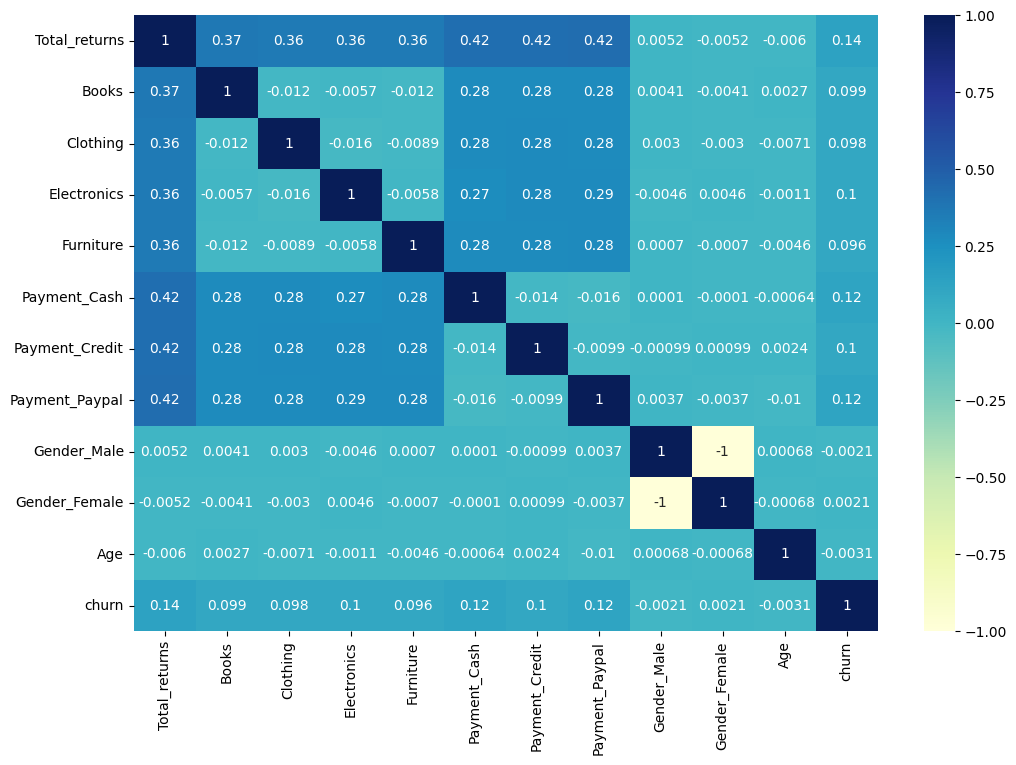

In [ ]:
cor = df_1[['Total_returns',
       'Books', 'Clothing', 'Electronics', 'Furniture', 'Payment_Cash',
       'Payment_Credit', 'Payment_Paypal', 'Gender_Male', 'Gender_Female',
       'Age', 'churn']]



plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(cor.corr(), annot=True, cmap="YlGnBu")

# Display the plot
plt.show()


In [ ]:
#train-test split
from sklearn.model_selection import train_test_split


X= df_1[['Total_returns',
       'Books', 'Clothing', 'Electronics', 'Furniture', 'Payment_Cash',
       'Payment_Credit', 'Payment_Paypal', 'Gender_Female',
       'Age', 'churn']]
y= df_1[['CLV']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123 )

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

y_base = np.full_like(y_test, y_train.mean(), dtype=float)
mae_base = mean_absolute_error(y_test, y_base)
print("Baseline MAE:", mae_base)

Baseline MAE: 19077.711480788163


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

#Evaluation
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

#cross validation
lr_scores_mae = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


print(f'LinearRegression R2: {r2_lr}')
print(f'LinearRegression test MAE: {mae_lr}')
print(f'LinearRegression test RMSE: {rmse_lr}')
print(f'LinearRegression neg_mean_squared_error: {lr_scores_mae.mean()} +/- {lr_scores_mae.std()}')


LinearRegression R2: 0.7431922839786655
LinearRegression test MAE: 9334.58162016201
LinearRegression test RMSE: 12073.310451584759
LinearRegression neg_mean_squared_error: -9397.110373806965 +/- 107.5757512985721


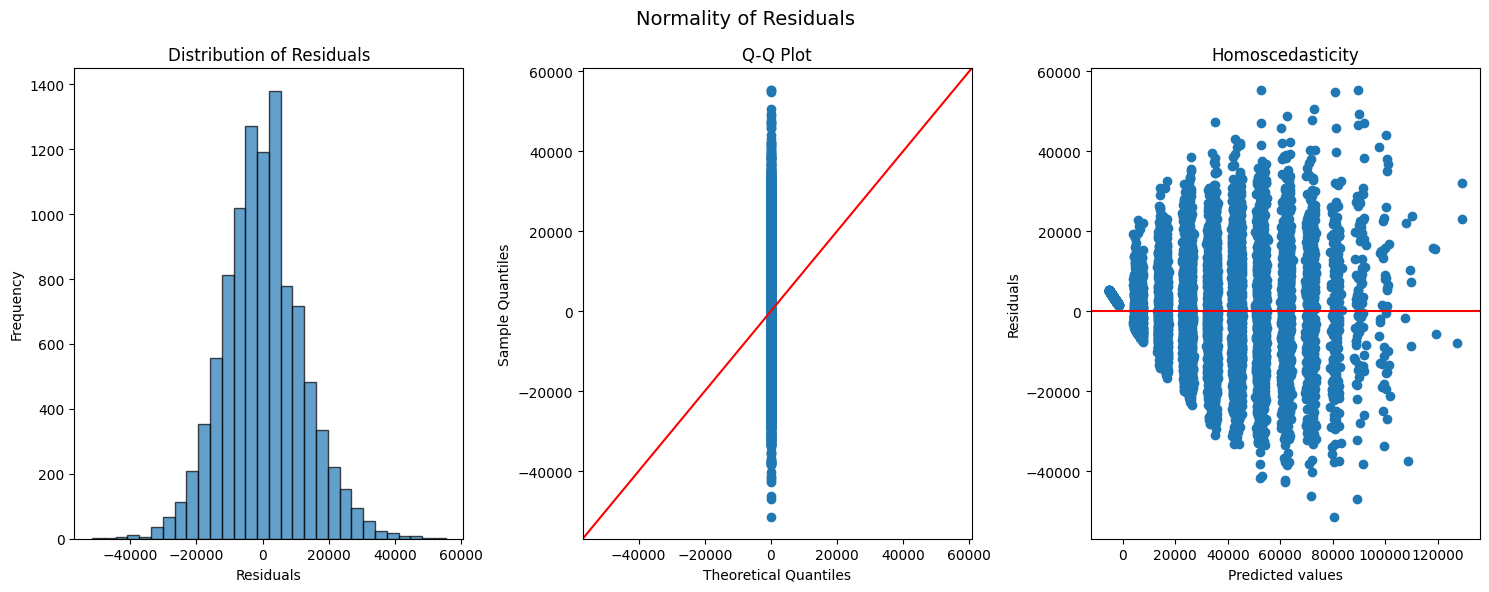

In [ ]:
# Function for qq_plots
import scipy.stats as stats
import statsmodels.api as sm

# Create subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 6))

# Extract residuals from model
residuals = y_test - y_pred

# Histogram of residuals
ax0.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
ax0.set_xlabel('Residuals')
ax0.set_ylabel('Frequency')
ax0.set_title('Distribution of Residuals')

# Q-Q plot
sm.qqplot(residuals, dist=stats.norm, line='45', ax=ax1)
ax1.set_title('Q-Q Plot')

# Heteroscedasticity
ax2.scatter(y_pred, residuals)
ax2.axhline(0, color='red')
ax2.set_xlabel("Predicted values")
ax2.set_ylabel("Residuals")
ax2.set_title("Homoscedasticity")

# Overall title
fig.suptitle('Normality of Residuals', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

#Evaluation
mae_dt = mean_absolute_error(y_test, y_pred)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
r2_dt = r2_score(y_test, y_pred)

#cross validation
dt_scores_mae = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


print(f'DecisionTree R2: {r2_dt}')
print(f'DecisionTree test MAE: {mae_dt}')
print(f'DecisionTree test RMSE: {rmse_dt}')
print(f'DecisionTree neg_mean_absolute_error: {dt_scores_mae.mean()} +/- {dt_scores_mae.std()}')

DecisionTree R2: 0.44194673901827564
DecisionTree test MAE: 13493.345494897952
DecisionTree test RMSE: 17797.547435347995
DecisionTree neg_mean_absolute_error: -13511.819787419376 +/- 106.24972611713832


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

#Evaluation
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

#cross validation
rf_scores_mae = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


print(f'RandomForest R2: {r2_rf}')
print(f'RandomForest test MAE: {mae_rf}')
print(f'RandomForest test MSE: {rmse_rf}')
print(f'LinearRegression neg_mean_absolute_error: {rf_scores_mae.mean()} +/- {rf_scores_mae.std()}')


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomForest R2: 0.6970752988474167
RandomForest test MAE: 10010.066976509112
RandomForest test MSE: 13112.626110510515
LinearRegression neg_mean_absolute_error: -9998.326150779732 +/- 82.43898903017532


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

model_gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
model_gbr.fit(X_train, y_train)

y_pred = model_gbr.predict(X_test)

#Evaluation
mae_gbr = mean_absolute_error(y_test, y_pred)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gbr = r2_score(y_test, y_pred)

#cross validation
gbr_scores_mae = cross_val_score(model_gbr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


print(f'GradientBoosting R2: {r2_gbr}')
print(f'GradientBoosting test MAE: {mae_gbr}')
print(f'GradientBoosting test RMSE: {rmse_gbr}')
print(f'GradientBoosting neg_mean_squared_error: {gbr_scores_mae.mean()} +/- {gbr_scores_mae.std()}')


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

GradientBoosting R2: 0.7419867853477938
GradientBoosting test MAE: 9288.387606988683
GradientBoosting test RMSE: 12101.614350048621
GradientBoosting neg_mean_squared_error: -9370.496402233173 +/- 82.40945945533088


In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)


param_grid = {
    "n_estimators": [600, 1000],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3],
    "min_child_weight": [1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 0.1],
    "reg_lambda": [1.0, 3.0],
    "reg_alpha": [0.0, 0.1],
}

grid = GridSearchCV(
    xgb,
    param_grid,
    scoring="neg_mean_absolute_error",  # MAE is often nicer for CLV
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_
y_pred_test_xgb = best_xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_test_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))



print("Best params:", grid.best_params_)
print("XGBOOST R2 Score:", r2_xgb)
print("XGBOOST Test MAE:", mae_xgb)
print("XGBOOST Test RMSE:",rmse_xgb)
print("Best cross-validated MAE:", -grid.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 600, 'reg_alpha': 0.1, 'reg_lambda': 3.0, 'subsample': 1.0}
XGBOOST R2 Score: 0.7427965998649597
XGBOOST Test MAE: 9252.55078125
XGBOOST Test RMSE: 12082.607665566238
Best cross-validated MAE: 9336.7537109375


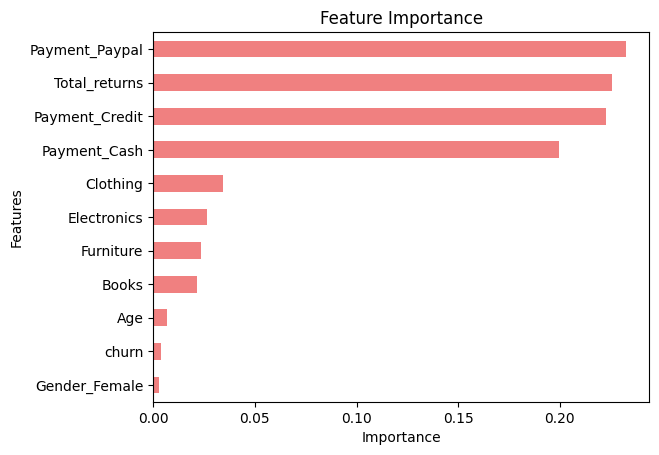

In [ ]:
from xgboost import plot_importance
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
importances_xgb = best_xgb.feature_importances_

# Convert the NumPy array to a pandas Series for plotting
importances_xgb = pd.Series(importances_xgb, index=X_train.columns)

importances_xgb.sort_values().plot(kind='barh', color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()



## **Conclusion**

To summarize, customer lifetime value (CLV) was predicted using historical transaction features such as product category, payment method, return rate, and others.

Five models—Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost—were evaluated for CLV prediction in an e-commerce setting. Among them, the XGBoost model achieved the best performance in terms of MAE, with a value of 9,252, indicating the lowest average prediction error.
(Feature importance analysis shows that payment method and return rate contribute the most to the model’s performance.)

Although the linear regression model achieved better RMSE and R² scores, MAE is a more relevant metric for typical customers, and the lower MAE of XGBoost indicates better practical prediction accuracy. Therefore, the XGBoost model is selected as the final model for CLV prediction.



In [ ]:
metrics = {
    'Linear Regression': {'RMSE': rmse_lr , 'MAE': mae_lr, 'R2': r2_lr},
    'Decision Tree': {'RMSE': rmse_dt, 'MAE': mae_dt, 'R2': r2_dt},
    'Random Forest': {'RMSE': rmse_rf, 'MAE': mae_rf, 'R2': r2_rf},
    'Gradient Boost': {'RMSE':  rmse_gbr, 'MAE': mae_gbr, 'R2': r2_gbr},
    'XGBoost': {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R2': r2_xgb}
}

df_metrics = pd.DataFrame(metrics)
df_metrics

,Linear Regression,Decision Tree,Random Forest,Gradient Boost,XGBoost
RMSE,12073.310452,17797.547435,13112.626111,12101.614350,12082.607666
MAE,9334.581620,13493.345495,10010.066977,9288.387607,9252.550781
R2,0.743192,0.441947,0.697075,0.741987,0.742797
